In [36]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install sklearn
!pip install keras
!pip install tensorflow

  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached Werkzeug-2.0.2-py3-none-any.whl (288 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4847 sha256=55bd483176895bd0f4845ec82afd7cda2e78a9e8a5dc6f2022ab4382d165e1af
  Stored in directory: c:\users\kiit\appdata\local\pip\cache\wheels\b6\0d\90\0d1bbd99855f99cb2f6c2e5ff96f8023fad8ec367695f7d72d
Successfully built termcolor
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.0.0
    Uninstalling cachetools-5.0.0:
      Successfully uninstalled cachetools-5.0.0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!pip install pandas_datareader

In [5]:
import pandas_datareader as dr
import datetime as dt

In [6]:
ticker = 'AAPL'
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2019, 12, 31)
df = dr.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452590
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553025
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459939
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447997


In [7]:
df = df.reset_index()

In [10]:
df.head()

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0


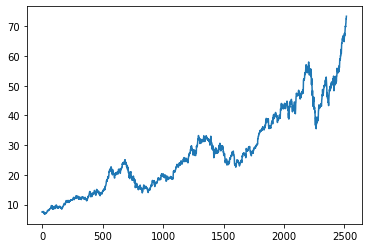

In [12]:
plt.plot(df.Close)

In [14]:
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

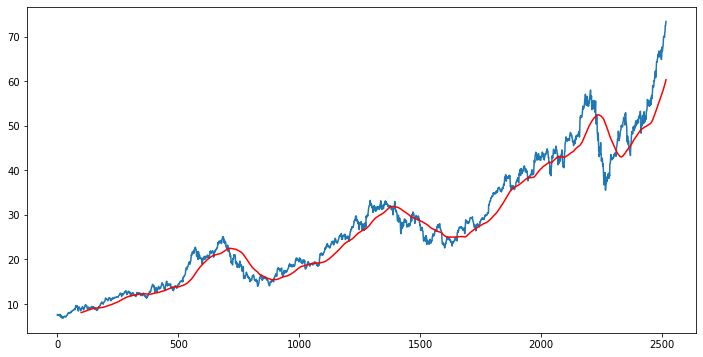

In [16]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [17]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

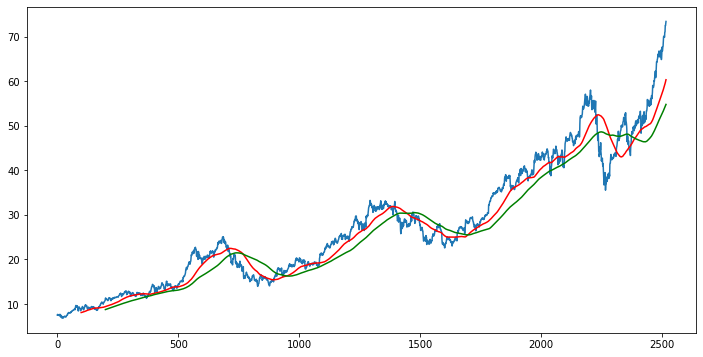

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [19]:
df.shape

(2517, 5)

In [91]:
train = pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
test = pd.DataFrame(df['Close'][int(len(df)*0.7):int(len(df))])

In [92]:
train.shape
test.shape

(756, 1)

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [94]:
train_array = scaler.fit_transform(train) 
train_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [96]:
x_train = []
y_train = []

for i in range(100, train_array.shape[0]):
    x_train.append(train_array[i-100:i])
    y_train.append(train_array[i, 0])

In [97]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [99]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [100]:
model = Sequential()
model.add(LSTM( units=50, activation='relu', return_sequences = True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM( units=60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM( units=80, activation='relu', return_sequences = True))
model.add(Dropout(0.4))
          
model.add(LSTM( units=120, activation='relu'))
model.add(Dropout(0.5))
          
model.add(Dense(units = 1))

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 100, 50)           10400     
                                                                 
 dropout_12 (Dropout)        (None, 100, 50)           0         
                                                                 
 lstm_13 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_13 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_14 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_14 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_15 (LSTM)              (None, 120)              

In [102]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 [==============================] - 39s 445ms/step - loss: 0.0556
Epoch 2/50
52/52 [==============================] - 23s 449ms/step - loss: 0.0119
Epoch 3/50
52/52 [==============================] - 23s 448ms/step - loss: 0.0098
Epoch 4/50
52/52 [==============================] - 23s 435ms/step - loss: 0.0096
Epoch 5/50
52/52 [==============================] - 23s 446ms/step - loss: 0.0079
Epoch 6/50
52/52 [==============================] - 23s 449ms/step - loss: 0.0085
Epoch 7/50
52/52 [==============================] - 23s 444ms/step - loss: 0.0077
Epoch 8/50
52/52 [==============================] - 23s 447ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 23s 437ms/step - loss: 0.0068
Epoch 10/50
52/52 [==============================] - 24s 453ms/step - loss: 0.0071
Epoch 11/50
52/52 [==============================] - 21s 408ms/step - loss: 0.0066
Epoch 12/50
52/52 [==============================] - 22s 432ms/step - loss: 0.0067
Epoch 13/50
5

In [103]:
model.save('keras_model.h5')

In [129]:
test.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [130]:
train.tail(100)

,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [131]:
past_100_days = train.tail(100)

In [132]:
final_df = past_100_days.append(test, ignore_index=True)

In [133]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [134]:
input_data = scaler.fit_transform(final_df) 
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [135]:
input_data.shape

(856, 1)

In [136]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [137]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [138]:
y_test.shape

(756,)

In [139]:
y_predicted = model.predict(x_test)
y_predicted

array([[0.13021985],
       [0.13105845],
       [0.13187636],
       [0.13264123],
       [0.1333265 ],
       [0.13391171],
       [0.13438842],
       [0.13476539],
       [0.13506487],
       [0.13531308],
       [0.13553834],
       [0.135761  ],
       [0.13599415],
       [0.13625051],
       [0.13653691],
       [0.1368539 ],
       [0.13719851],
       [0.1375643 ],
       [0.13794488],
       [0.13834506],
       [0.13877006],
       [0.13922241],
       [0.13969877],
       [0.14020644],
       [0.14079842],
       [0.14152889],
       [0.14244993],
       [0.14361043],
       [0.1450499 ],
       [0.14679094],
       [0.148835  ],
       [0.15116619],
       [0.15368724],
       [0.15637189],
       [0.15921107],
       [0.16218203],
       [0.16525729],
       [0.16841036],
       [0.17160974],
       [0.17481875],
       [0.1779994 ],
       [0.18111475],
       [0.18412939],
       [0.1870305 ],
       [0.18981491],
       [0.19248162],
       [0.19501978],
       [0.197

In [140]:
scaler.scale_

array([0.02099517])

In [141]:
scale_factor = 1/0.02099517
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [142]:
print(y_test)

[ 3.40000177  3.17250083  3.2550013   3.22250007  3.37000108  3.69500186
  3.96500043  3.99500112  4.15500098  4.03000097  3.9775012   4.21750098
  4.21500045  4.16250068  4.21750098  4.23750144  4.21000129  4.68750033
  4.70250163  4.70500026  4.62500033  4.55500063  6.40500114  6.35000083
  6.4875016   6.78999949  7.10000088  7.22749952  7.32250075  7.24749998
  7.53999954  7.97250232  8.09499988  8.05500278  8.14750157  8.39250052
  8.49500144  8.35000097  8.38250219  8.44999945  8.46500266  9.16499965
  8.957503    9.16250103  9.05250041  9.0975024   8.96750132  8.88749948
  9.00250117  9.01750056  8.96500269  9.33250302  9.39000196  9.21500271
  9.58250304  9.17750042  9.5725009   9.4475009   9.3775012   9.43750257
 10.16750217 10.24750019 10.19999957 10.13250232 10.14250064 10.41000249
 10.22250248 10.13250232 10.05250048 10.01000093  9.62500259  9.66750213
  9.48000212  9.67500183  9.51750059  9.38749952  9.82750199  9.78500244
 10.12750125 10.35000111 10.13749957 10.16499973 10

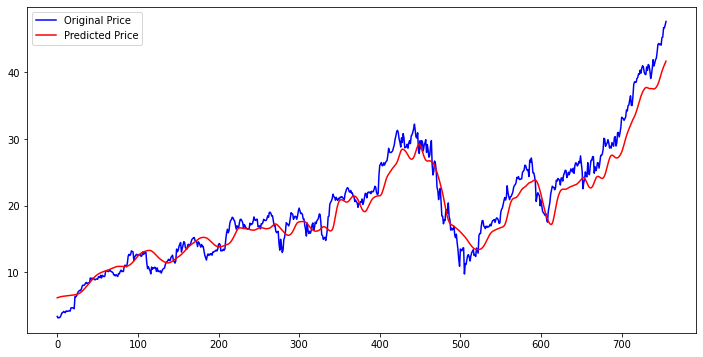

In [143]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.legend()
plt.show()